# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------imports------------------</h4>
# <hr style='color:blue'/>

In [1]:
import pandas as pd
import seaborn as sb
import time
import re

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------red CSV file and drop first column------------------</h4>
# <hr style='color:blue'/>

In [2]:
df = pd.read_csv('C:\\csv-data-collect\\github-2023_2.csv',index_col=0)
df_contributors = pd.read_csv('C:\\csv-data-collect\\github-2023_06_31_contributors.csv')
df_contributors_top_20 = pd.read_csv('C:\\csv-data-collect\\github-2023_06_31_contributors_top_20_stars.csv')
df_repos = pd.read_csv('C:\\csv-data-collect\\github-2023_06_31.csv',index_col=0)

# <hr />
# <p style='color:crimson;text-align:center;font-size:20px'>Scheme to describe a process</p>
# <hr />

# <img src='https://cdn.discordapp.com/attachments/922505547096408077/1121716104461557850/Road-map.png' />
#

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------duplicates------------------</h4>
# <hr style='color:blue'/>

In [3]:
dup_shape = df_repos[df_repos.duplicated()].shape
print(f'\x1b[31m\"Duplicate shape:{dup_shape}:\"\x1b[0m')

"Duplicate shape:(265, 18):"


In [4]:
dup_shape = df_repos.drop_duplicates(inplace=True)
print(f'\x1b[31m\"Duplicate shape:{dup_shape}:\"\x1b[0m')

"Duplicate shape:None:"


# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Languages------------------</h4>
# <hr style='color:blue'/>

In [5]:
print('\x1b[31m\"--------------------------------List of languages:--------------------------------\"\x1b[0m')
len(df_repos['language'].unique().tolist())

"--------------------------------List of languages:--------------------------------"


183

In [6]:
Null_language = df_repos.loc[df_repos['language'].isna()].shape
print(f'\x1b[31m\"Language with value of Null:{Null_language}:\"\x1b[0m')

"Language with value of Null:(8472, 18):"


In [7]:
Null_language = df_repos.loc[df_repos['language'].isna()].index
Null_language = df_repos.drop(Null_language,inplace=True)
print(f'\x1b[31m\"Language with value of Null:{Null_language}:\"\x1b[0m')

"Language with value of Null:None:"


# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Check for Outliers------------------</h4>
# <hr style='color:blue'/>

"Display Outliers using boxplot:"


<Axes: >

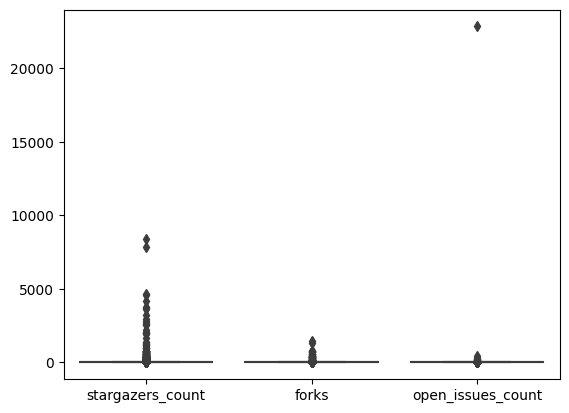

In [8]:
print(f'\x1b[31m\"Display Outliers using boxplot:\"\x1b[0m')
sb.boxplot(df_repos[['stargazers_count','forks','open_issues_count']])

In [9]:
print(f'\x1b[31m\"Implementation For Stars:\"\x1b[0m')
Q1 = df_repos['stargazers_count'].quantile(0.25)
Q3 = df_repos['stargazers_count'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(f'\x1b[31m\"Lower Whisker:{Lower_Whisker}:\"\x1b[0m')
print(f'\x1b[31m\"Lower Whisker:{Upper_Whisker}:\"\x1b[0m')

df_repos.loc[(df_repos['stargazers_count'] < Lower_Whisker)|(df_repos['stargazers_count'] > Upper_Whisker)].shape


"Implementation For Stars:"
"Lower Whisker:-4.0:"
"Lower Whisker:12.0:"


(2288, 18)

In [10]:
print(f'\x1b[31m\"Implementation For Forks:\"\x1b[0m')
Q1 = df_repos['forks'].quantile(0.25)
Q3 = df_repos['forks'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(f'\x1b[31m\"Lower Whisker:{Lower_Whisker}:\"\x1b[0m')
print(f'\x1b[31m\"Upper Whisker:{Upper_Whisker}:\"\x1b[0m')

df_repos.loc[(df_repos['forks'] < Lower_Whisker)|(df_repos['forks'] > Upper_Whisker)].shape


"Implementation For Forks:"
"Lower Whisker:-1.5:"
"Upper Whisker:2.5:"


(2236, 18)

In [11]:
print(f'\x1b[31m\"Implementation For Open Issues:\"\x1b[0m')
Q1 = df_repos['open_issues_count'].quantile(0.25)
Q3 = df_repos['open_issues_count'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(f'\x1b[31m\"Lower Whisker:{Lower_Whisker}:\"\x1b[0m')
print(f'\x1b[31m\"Upper Whisker:{Upper_Whisker}:\"\x1b[0m')

df_repos.loc[(df_repos['open_issues_count'] < Lower_Whisker)|(df_repos['open_issues_count'] > Upper_Whisker)].shape

"Implementation For Open Issues:"
"Lower Whisker:0.0:"
"Upper Whisker:0.0:"


(3349, 18)

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Standardize Formats------------------</h4>
# <hr style='color:blue'/>

In [12]:
df_repos['created_at'] = pd.to_datetime(df_repos['created_at']).dt.date
df_repos['updated_at'] = pd.to_datetime(df_repos['updated_at']).dt.date
df_repos['pushed_at'] = pd.to_datetime(df_repos['pushed_at']).dt.date
print('\x1b[31m\"--------------------------------created--------------------------------\"\x1b[0m')
print(df_repos['created_at'].head(2))
print('\x1b[31m\"--------------------------------updated--------------------------------\"\x1b[0m')
print(df_repos['updated_at'].head(2))
print('\x1b[31m\"--------------------------------pushed--------------------------------\"\x1b[0m')
print(df_repos['pushed_at'].head(2))

"--------------------------------created--------------------------------"
0    2023-06-01
1    2023-06-01
Name: created_at, dtype: object
"--------------------------------updated--------------------------------"
0    2023-07-06
1    2023-07-06
Name: updated_at, dtype: object
"--------------------------------pushed--------------------------------"
0    2023-07-06
1    2023-06-18
Name: pushed_at, dtype: object


In [60]:
df_repos['description']

0                         Segment Anything in High Quality
1                          Not Quite RARBG's main website.
2        Official repo for VideoComposer: Compositional...
3        AWQ: Activation-aware Weight Quantization for ...
4                                                      NaN
                               ...                        
28985                             OpenAI Whisper Tutorials
28990    First web application using Java OOP, HTML and...
28991          Golds Gym Website created using Rapid API's
28994    Shitty roblox exploit template from before byf...
28995                                                  NaN
Name: description, Length: 20259, dtype: object

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Correct Errors------------------</h4>
# <hr style='color:blue'/>

In [64]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001fae5"
                           u"\U0001fae3"
                           u"\U0001fae2"
                           u"\U0001fae0"
                           u"\U0001fad9"
                           u"\U0001fabf"
                           u"\U0001fabc"
                           u"\U0001fab7"
                           u"\U0001faaa"
                           u"\U0001faa9"
                           u"🫖"
                           u"🫀"
                           u"🫒"
                           u"🫐"
                           u"⏯"
                           u"🪶"
                           u"🪵"
                           u"🪴"
                           u"U+ff0c"
                           u"⏺"
                           u"⏳"
                           u"⏱"
                           u"⏰"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df_repos['description'] = df_repos['description'].apply(remove_emoji)

# <hr style='color:blue'/>
# <h4 style='color:crimson;font-size:20px;text-align:center'>------------------Handle missing values------------------</h4>
# <hr style='color:blue'/>

In [13]:
print('\x1b[31m\"--------------------------------Description: Replace \"null\" value with \"No Description\" value--------------------------------\"\x1b[0m')
df_repos['description'].fillna('No Description',inplace=True)
df_repos[df_repos['description'] == "No Description"].head(1)

"--------------------------------Description: Replace "null" value with "No Description" value--------------------------------"


,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,contributors_url,commits_url,topics,license,owner
4,648156011,KasperskyLab/triangle_check,https://github.com/KasperskyLab/triangle_check,https://github.com/KasperskyLab/triangle_check...,314,Python,22,2023-06-01,2023-07-05,2023-06-26,No Description,https://api.github.com/repos/KasperskyLab/tria...,4,https://api.github.com/repos/KasperskyLab/tria...,https://api.github.com/repos/KasperskyLab/tria...,[],MIT License,Organization


In [16]:
print('\x1b[31m\"--------------------------------license: Replace \"null\" value with \"Not included\" value--------------------------------\"\x1b[0m')
df_repos['license'].fillna('Not included',inplace=True)
df_repos[df_repos['license'] == "Not included"].head(1)

"--------------------------------license: Replace "null" value with "Not included" value--------------------------------"


,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,contributors_url,commits_url,topics,license,owner


In [18]:
print('\x1b[31m\"--------------------------------topics: Replace \"null\" value with \"Not included\" value--------------------------------\"\x1b[0m')

df_repos['topics'] = df_repos['topics'].replace("[]", '[\'No topics\']')
df_repos.loc[df_repos['topics'] == '[\'No topics\']'].head(1)

"--------------------------------topics: Replace "null" value with "Not included" value--------------------------------"


,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,contributors_url,commits_url,topics,license,owner
3,647984858,mit-han-lab/llm-awq,https://github.com/mit-han-lab/llm-awq,https://github.com/mit-han-lab/llm-awq.git,401,Python,31,2023-06-01,2023-07-06,2023-07-06,AWQ: Activation-aware Weight Quantization for ...,https://api.github.com/repos/mit-han-lab/llm-a...,17,https://api.github.com/repos/mit-han-lab/llm-a...,https://api.github.com/repos/mit-han-lab/llm-a...,['No topics'],MIT License,Organization


In [65]:
df_repos.shape
df_repos.to_csv('C:\\csv-data-collect\\github-2023_06_31_main.csv', index=False)